Lien du dataset : https://www.kaggle.com/yamaerenay/spotify-dataset-19212020-160k-tracks

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)

In [2]:
original_df = pd.read_csv('data/data.csv')

## Data preprocessing

In [3]:
df = original_df.drop(columns=['artists', 'id', 'name', 'release_date'])

dummies = pd.get_dummies(df['key'])

for j in dummies.columns:
    df['key' + str(j)] = dummies[j]
    
df = df.drop(columns=['key', 'year', 'popularity'])

In [4]:
from sklearn.preprocessing import MinMaxScaler

columns_scaler = ['duration_ms', 'loudness', 'tempo']

df[columns_scaler] = MinMaxScaler().fit_transform(df[columns_scaler])

In [5]:
df.describe()

acousticness   danceability    duration_ms         energy  \
count  174389.000000  174389.000000  174389.000000  174389.000000   
mean        0.499228       0.536758       0.042726       0.482721   
std         0.379936       0.176025       0.027824       0.272685   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.087700       0.414000       0.030224       0.249000   
50%         0.517000       0.548000       0.037659       0.465000   
75%         0.895000       0.669000       0.048897       0.711000   
max         0.996000       0.988000       1.000000       1.000000   

            explicit  instrumentalness       liveness       loudness  \
count  174389.000000     174389.000000  174389.000000  174389.000000   
mean        0.068135          0.197252       0.211123       0.755605   
std         0.251978          0.334574       0.180493       0.089133   
min         0.000000          0.000000       0.000000       0.000000   
25%         0.000000          0.000000       0.099200       0.706162   
50%         0.000000          0.000524       0.138000       0.769932   
75%         0.000000          0.252000       0.270000       0.822191   
max         1.000000          1.000000       1.000000       1.000000   

                mode    speechiness          tempo        valence  \
count  174389.000000  174389.000000  174389.000000  174389.000000   
mean        0.702384       0.105729       0.480506       0.524533   
std         0.457211       0.182260       0.124244       0.264477   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.035200       0.385743       0.311000   
50%         1.000000       0.045500       0.475617       0.536000   
75%         1.000000       0.076300       0.554444       0.743000   
max         1.000000       0.971000       1.000000       1.000000   

                key0           key1           key2           key3  \
count  174389.000000  174389.000000  174389.000000  174389.000000   
mean        0.125966       0.077769       0.108470       0.041746   
std         0.331811       0.267808       0.310974       0.200008   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max         1.000000       1.000000       1.000000       1.000000   

                key4          key5           key6           key7  \
count  174389.000000  174389.00000  174389.000000  174389.000000   
mean        0.076421       0.09488       0.052905       0.122502   
std         0.265671       0.29305       0.223844       0.327866   
min         0.000000       0.00000       0.000000       0.000000   
25%         0.000000       0.00000       0.000000       0.000000   
50%         0.000000       0.00000       0.000000       0.000000   
75%         0.000000       0.00000       0.000000       0.000000   
max         1.000000       1.00000       1.000000       1.000000   

                key8           key9          key10          key11  
count  174389.000000  174389.000000  174389.000000  174389.000000  
mean        0.061202       0.103843       0.071140       0.063158  
std         0.239702       0.305057       0.257059       0.243247  
min         0.000000       0.000000       0.000000       0.000000  
25%         0.000000       0.000000       0.000000       0.000000  
50%         0.000000       0.000000       0.000000       0.000000  
75%         0.000000       0.000000       0.000000       0.000000  
max         1.000000       1.000000       1.000000       1.000000

### Clustering by genres preprocessing

In [6]:
df_by_genres = pd.read_csv('data/data_by_genres.csv')
original_df_by_genres = df_by_genres.copy()

In [7]:
columns_scaler = ['duration_ms', 'loudness', 'tempo']
df_by_genres[columns_scaler] = MinMaxScaler().fit_transform(df_by_genres[columns_scaler])

dummies = pd.get_dummies(df_by_genres['key'])

for j in dummies.columns:
    df_by_genres['key' + str(j)] = dummies[j]
    
df_by_genres = df_by_genres.drop(columns=['key', 'genres', 'popularity'])

In [8]:
df_by_genres

acousticness  danceability  duration_ms    energy  instrumentalness  \
0         0.754600      0.284100     0.093302  0.159580          0.484374   
1         0.485515      0.312000     0.294856  0.391678          0.477250   
2         0.028900      0.673000     0.029735  0.950000          0.630000   
3         0.535793      0.546937     0.063406  0.485430          0.278442   
4         0.694276      0.516172     0.049572  0.330533          0.036080   
...            ...           ...          ...       ...               ...   
3227      0.003910      0.553000     0.003401  0.942000          0.961000   
3228      0.208648      0.533837     0.067632  0.620470          0.163334   
3229      0.272928      0.641889     0.119132  0.695778          0.257604   
3230      0.993000      0.705667     0.048579  0.172667          0.468633   
3231      0.381496      0.625963     0.044423  0.572417          0.019234   

      liveness  loudness  speechiness     tempo   valence  mode  key0  key1  \
0     0.168580  0.464704     0.062060  0.199110  0.143380     1     0     0   
1     0.265940  0.565826     0.071717  0.382040  0.236483     1     0     0   
2     0.069000  0.823080     0.292000  0.872832  0.997000     1     0     0   
3     0.220970  0.729409     0.101511  0.363236  0.486361     1     0     0   
4     0.222983  0.703468     0.083627  0.293099  0.454077     1     0     0   
...        ...       ...          ...       ...       ...   ...   ...   ...   
3227  0.113000  0.820440     0.039900  0.488904  0.752000     1     0     0   
3228  0.201430  0.748161     0.061828  0.434258  0.576721     1     0     0   
3229  0.166011  0.782354     0.050511  0.295375  0.878444     1     0     0   
3230  0.179667  0.733719     0.348667  0.198625  0.739000     0     0     0   
3231  0.262545  0.754073     0.072440  0.456649  0.792174     1     0     0   

      key2  key3  key4  key5  key6  key7  key8  key9  key10  key11  
0        0     0     1     0     0     0     0     0      0      0  
1        0     0     0     0     0     0     0     0      0      1  
2        0     0     0     1     0     0     0     0      0      0  
3        0     0     0     0     0     1     0     0      0      0  
4        0     0     0     0     0     1     0     0      0      0  
...    ...   ...   ...   ...   ...   ...   ...   ...    ...    ...  
3227     0     0     0     0     0     1     0     0      0      0  
3228     0     0     0     0     0     0     0     1      0      0  
3229     0     0     0     0     0     1     0     0      0      0  
3230     0     0     0     0     0     1     0     0      0      0  
3231     0     0     0     0     0     0     0     1      0      0  

[3232 rows x 23 columns]

## KMeans by genres

In [9]:
from sklearn.cluster import KMeans
X = df_by_genres

In [10]:
n_clusters_list_genres = []
inertias_list_genres = []

for n_clusters in range(5,100,5):
    print('Fitting for ' + str(n_clusters) + ' clusters')
    model = KMeans(n_clusters=n_clusters, random_state=0)
    %time model.fit(X)
    n_clusters_list_genres.append(n_clusters)
    inertias_list_genres.append(model.inertia_)

Fitting for 5 clusters
CPU times: user 520 ms, sys: 184 ms, total: 704 ms
Wall time: 102 ms
Fitting for 10 clusters
CPU times: user 673 ms, sys: 208 ms, total: 882 ms
Wall time: 123 ms
Fitting for 15 clusters
CPU times: user 975 ms, sys: 303 ms, total: 1.28 s
Wall time: 173 ms
Fitting for 20 clusters
CPU times: user 1.29 s, sys: 395 ms, total: 1.69 s
Wall time: 226 ms
Fitting for 25 clusters
CPU times: user 1.55 s, sys: 452 ms, total: 2 s
Wall time: 276 ms
Fitting for 30 clusters
CPU times: user 1.75 s, sys: 510 ms, total: 2.26 s
Wall time: 305 ms
Fitting for 35 clusters
CPU times: user 2.01 s, sys: 583 ms, total: 2.59 s
Wall time: 345 ms
Fitting for 40 clusters
CPU times: user 2.15 s, sys: 613 ms, total: 2.76 s
Wall time: 368 ms
Fitting for 45 clusters
CPU times: user 2.28 s, sys: 637 ms, total: 2.92 s
Wall time: 390 ms
Fitting for 50 clusters
CPU times: user 2.76 s, sys: 786 ms, total: 3.55 s
Wall time: 468 ms
Fitting for 55 clusters
CPU times: user 2.96 s, sys: 826 ms, total: 3.79 s

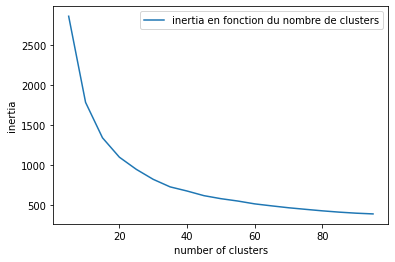

In [11]:
plt.plot(n_clusters_list_genres, inertias_list_genres, label='inertia en fonction du nombre de clusters')
plt.xlabel('number of clusters')
plt.ylabel('inertia')
plt.legend()
plt.show()

## Fit a model with optimal k = 35 thanks to elbow method

In [12]:
model = KMeans(n_clusters=35, random_state=0)
model.fit(X)
# Adapt df data to the data format used to train the model and predict over all songs
df_to_predict = df.drop(columns=['explicit'])
# Re-order columns
df_to_predict = df_to_predict[['acousticness','danceability','duration_ms','energy','instrumentalness','liveness','loudness','speechiness','tempo','valence','mode','key0','key1','key2','key3','key4','key5','key6','key7','key8','key9','key10','key11']]
X_predict = model.predict(df_to_predict)

In [13]:
df_to_predict['label'] = X_predict # Add a prediction column
df_to_predict['id'] = original_df['id'] # Add the id (to listen to the musics)

In [14]:
df_to_predict.head()

acousticness  danceability  duration_ms  energy  instrumentalness  \
0      0.991000         0.598     0.030637   0.224          0.000522   
1      0.643000         0.852     0.027237   0.517          0.026400   
2      0.993000         0.647     0.029792   0.186          0.000018   
3      0.000173         0.730     0.078215   0.798          0.801000   
4      0.295000         0.704     0.030054   0.707          0.000246   

   liveness  loudness  speechiness     tempo  valence  mode  key0  key1  key2  \
0    0.3790  0.741868       0.0936  0.615900   0.6340     0     0     0     0   
1    0.0809  0.825918       0.0534  0.356823   0.9500     0     0     0     0   
2    0.5190  0.750168       0.1740  0.400810   0.6890     1     1     0     0   
3    0.1280  0.825135       0.0425  0.525640   0.0422     1     0     0     1   
4    0.4020  0.845102       0.0768  0.501324   0.2990     0     0     0     0   

   key3  key4  key5  key6  key7  key8  key9  key10  key11  label  \
0     0     0     1     0     0     0     0      0      0     19   
1     0     0     1     0     0     0     0      0      0     19   
2     0     0     0     0     0     0     0      0      0      7   
3     0     0     0     0     0     0     0      0      0      5   
4     0     0     0     0     0     0     0      1      0      3   

                       id  
0  0cS0A1fUEUd1EW3FcF8AEI  
1  0hbkKFIJm7Z05H8Zl9w30f  
2  11m7laMUgmOKqI3oYzuhne  
3  19Lc5SfJJ5O1oaxY0fpwfh  
4  2hJjbsLCytGsnAHfdsLejp

In [15]:
df_to_predict[df_to_predict['label']==15] # Get all samples labeled with 15 

acousticness  danceability  duration_ms  energy  instrumentalness  \
31          0.032300         0.697     0.090764   0.617          0.902000   
34          0.021000         0.559     0.053129   0.830          0.146000   
39          0.310000         0.639     0.032824   0.552          0.855000   
44          0.000103         0.779     0.069389   0.724          0.887000   
68          0.167000         0.828     0.063761   0.467          0.933000   
...              ...           ...          ...     ...               ...   
174187      0.013600         0.876     0.030349   0.492          0.000283   
174320      0.000514         0.627     0.032456   0.500          0.000052   
174334      0.709000         0.467     0.039538   0.317          0.897000   
174340      0.034800         0.797     0.041807   0.403          0.809000   
174342      0.005500         0.744     0.041807   0.454          0.767000   

        liveness  loudness  speechiness     tempo  valence  mode  key0  key1  \
31        0.1490  0.790698       0.0609  0.550218    0.321     0     0     0   
34        0.1870  0.816287       0.0546  0.443158    0.352     0     0     0   
39        0.1350  0.729058       0.0374  0.525455    0.764     0     0     0   
44        0.1230  0.824164       0.0482  0.525669    0.226     0     0     0   
68        0.0741  0.721635       0.1220  0.525644    0.443     0     0     0   
...          ...       ...          ...       ...      ...   ...   ...   ...   
174187    0.0678  0.812622       0.1530  0.620286    0.400     0     0     0   
174320    0.0871  0.777120       0.0316  0.410653    0.195     0     0     0   
174334    0.1070  0.637961       0.0712  0.739387    0.373     0     0     0   
174340    0.0795  0.678694       0.0443  0.451687    0.557     0     0     0   
174342    0.1480  0.727210       0.0357  0.451888    0.627     0     0     0   

        key2  key3  key4  key5  key6  key7  key8  key9  key10  key11  label  \
31         0     0     0     0     0     0     0     0      0      1     15   
34         0     0     0     0     0     0     0     0      0      1     15   
39         0     0     0     0     0     0     0     0      0      1     15   
44         0     0     0     0     0     0     0     0      0      1     15   
68         0     0     0     0     0     0     0     0      0      1     15   
...      ...   ...   ...   ...   ...   ...   ...   ...    ...    ...    ...   
174187     0     0     0     0     0     0     0     0      0      1     15   
174320     0     0     0     0     0     0     0     0      0      1     15   
174334     0     0     0     0     0     0     0     0      0      1     15   
174340     0     0     0     0     0     0     0     0      0      1     15   
174342     0     0     0     0     0     0     0     0      0      1     15   

                            id  
31      0Yt4hib6XmdB0YOkVl3QoL  
34      0bq1lNI8OPhdRQYZZSSnQk  
39      0h3qkb5rHEVsQm9JeySob5  
44      0vhLeFi24U1oYB0odNNVV3  
68      1ierpLZZSofFzKqDzh28yj  
...                        ...  
174187  5UusfWUMMLEXLMc1ViNZoe  
174320  4qG2TLX6ELa9YZBdHO4gMx  
174334  4Rv4Y6yPqeFeVBpzWo6cnX  
174340  1gVfSGj1CAt3qjjS4k4MgU  
174342  1wxFgVhdpvQRhjnuBc6gkh  

[6019 rows x 25 columns]

In [16]:
# See how genres are labeled
df_by_genres_with_label = original_df_by_genres.copy()
df_by_genres_with_label['label'] = model.predict(X)
df_by_genres_with_label

genres  acousticness  danceability   duration_ms  \
0     21st century classical      0.754600      0.284100  3.525932e+05   
1                      432hz      0.485515      0.312000  1.047430e+06   
2                      8-bit      0.028900      0.673000  1.334540e+05   
3                         []      0.535793      0.546937  2.495312e+05   
4                 a cappella      0.694276      0.516172  2.018391e+05   
...                      ...           ...           ...           ...   
3227        zim urban groove      0.003910      0.553000  4.267200e+04   
3228                    zolo      0.208648      0.533837  2.641016e+05   
3229                    zouk      0.272928      0.641889  4.416418e+05   
3230            zurich indie      0.993000      0.705667  1.984173e+05   
3231                  zydeco      0.381496      0.625963  1.840881e+05   

        energy  instrumentalness  liveness   loudness  speechiness  \
0     0.159580          0.484374  0.168580 -22.153400     0.062060   
1     0.391678          0.477250  0.265940 -18.131267     0.071717   
2     0.950000          0.630000  0.069000  -7.899000     0.292000   
3     0.485430          0.278442  0.220970 -11.624754     0.101511   
4     0.330533          0.036080  0.222983 -12.656547     0.083627   
...        ...               ...       ...        ...          ...   
3227  0.942000          0.961000  0.113000  -8.004000     0.039900   
3228  0.620470          0.163334  0.201430 -10.878906     0.061828   
3229  0.695778          0.257604  0.166011  -9.518889     0.050511   
3230  0.172667          0.468633  0.179667 -11.453333     0.348667   
3231  0.572417          0.019234  0.262545 -10.643750     0.072440   

           tempo   valence  popularity  key  mode  label  
0      91.351000  0.143380    6.600000    4     1      8  
1     118.900933  0.236483   41.200000   11     1     21  
2     192.816000  0.997000    0.000000    5     1     23  
3     116.068980  0.486361   12.350770    7     1     29  
4     105.506031  0.454077   39.086248    7     1     29  
...          ...       ...         ...  ...   ...    ...  
3227  134.995000  0.752000    9.000000    7     1     22  
3228  126.765194  0.576721   31.108254    9     1      4  
3229  105.848889  0.878444   32.555556    7     1      1  
3230   91.278000  0.739000    0.000000    7     0     17  
3231  130.137242  0.792174   27.703810    9     1      4  

[3232 rows x 15 columns]

In [17]:
# Find rock style sample to know how it has been labeled
df_by_genres_with_label[df_by_genres_with_label['genres']=='rock']

genres  acousticness  danceability    duration_ms    energy  \
2546   rock      0.160153      0.503948  249724.257208  0.707018   

      instrumentalness  liveness  loudness  speechiness      tempo   valence  \
2546          0.101601  0.211169 -8.169173     0.065831  124.70926  0.510827   

      popularity  key  mode  label  
2546   42.365989    9     1      4

In [18]:
# For each label, count how many varieties of rock is there
# Here we can see there's 47 rock varieties with label 1 and 44 with label 4
np.bincount(df_by_genres_with_label[df_by_genres_with_label.genres.str.contains('.*rock.*')]['label'])

array([ 8, 47, 16,  5, 44, 16,  1,  2,  5,  3,  7,  3,  0,  9,  6,  4,  2,
        4,  4,  1,  2,  2,  4,  6,  0,  0,  9,  1,  1,  4,  0,  5,  1,  0,
        2])

In [24]:
df_by_genres_with_label[df_by_genres_with_label['label']==4] # Show all styles labeled with 4

genres  acousticness  danceability    duration_ms  \
54                album rock      0.181420      0.517314  269234.622643   
55         albuquerque indie      0.380733      0.527101  235680.297980   
66    alternative roots rock      0.218744      0.546511  262296.766667   
106           anthem worship      0.197000      0.478379  288462.157168   
109            antiviral pop      0.135887      0.580806  213324.961111   
...                      ...           ...           ...            ...   
3196           women's music      0.581013      0.549360  259500.581617   
3209           wyoming roots      0.205562      0.467229  222329.735714   
3226           zhongguo feng      0.450409      0.627971  263953.600000   
3228                    zolo      0.208648      0.533837  264101.612142   
3231                  zydeco      0.381496      0.625963  184088.078095   

        energy  instrumentalness  liveness   loudness  speechiness  \
54    0.659917          0.083199  0.212517  -9.865573     0.056450   
55    0.581621          0.019269  0.182661  -8.571177     0.034905   
66    0.583411          0.098239  0.149330  -7.664222     0.060426   
106   0.627220          0.036642  0.209411  -7.296916     0.054261   
109   0.720833          0.016527  0.335036  -6.411983     0.111161   
...        ...               ...       ...        ...          ...   
3196  0.393170          0.000761  0.161826 -11.647712     0.080952   
3209  0.581357          0.000109  0.143910  -9.654714     0.045366   
3226  0.531114          0.000072  0.168331  -7.479000     0.031360   
3228  0.620470          0.163334  0.201430 -10.878906     0.061828   
3231  0.572417          0.019234  0.262545 -10.643750     0.072440   

           tempo   valence  popularity  key  mode  label  
54    124.401441  0.548134   35.423908    9     1      4  
55    125.969121  0.531773   52.964646    9     1      4  
66    104.374267  0.474700   41.344444    9     1      4  
106   124.862554  0.344812   48.879850    9     1      4  
109   128.150600  0.609789   53.311111    9     1      4  
...          ...       ...         ...  ...   ...    ...  
3196  115.533010  0.445071   44.803300    9     1      4  
3209   94.966007  0.555229   44.550000    9     1      4  
3226  136.829543  0.396886   52.942857    9     1      4  
3228  126.765194  0.576721   31.108254    9     1      4  
3231  130.137242  0.792174   27.703810    9     1      4  

[231 rows x 15 columns]

## KMeans by songs - More expensive

In [20]:
X = df

In [21]:
n_clusters_list_songs = []
inertias_list_songs = []

for n_clusters in range(10,100,10):
    print('Fitting for ' + str(n_clusters) + ' clusters')
    model = KMeans(n_clusters=n_clusters, random_state=0)
    %time model.fit(X)
    n_clusters_list_songs.append(n_clusters)
    inertias_list_songs.append(model.inertia_)

Fitting for 10 clusters
CPU times: user 15.1 s, sys: 3.11 s, total: 18.2 s
Wall time: 2.58 s
Fitting for 20 clusters
CPU times: user 25.9 s, sys: 4.66 s, total: 30.6 s
Wall time: 4.74 s
Fitting for 30 clusters
CPU times: user 35.9 s, sys: 6.21 s, total: 42.1 s
Wall time: 7.29 s
Fitting for 40 clusters
CPU times: user 44.8 s, sys: 7.44 s, total: 52.3 s
Wall time: 8.88 s
Fitting for 50 clusters
CPU times: user 1min 3s, sys: 10.8 s, total: 1min 14s
Wall time: 12.7 s
Fitting for 60 clusters
CPU times: user 1min 9s, sys: 11.6 s, total: 1min 20s
Wall time: 14.7 s
Fitting for 70 clusters
CPU times: user 1min 29s, sys: 13.5 s, total: 1min 42s
Wall time: 18.5 s
Fitting for 80 clusters
CPU times: user 1min 40s, sys: 16.2 s, total: 1min 56s
Wall time: 21.6 s
Fitting for 90 clusters
CPU times: user 1min 50s, sys: 17.8 s, total: 2min 8s
Wall time: 23 s


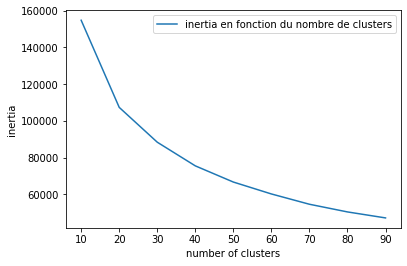

In [22]:
plt.plot(n_clusters_list_songs, inertias_list_songs, label='inertia en fonction du nombre de clusters')
plt.xlabel('number of clusters')
plt.ylabel('inertia')
plt.legend()
plt.show()